<a href="https://colab.research.google.com/github/Zoro114/machine_learning/blob/main/Lenet_5_algo_on_mnist_dataset_high_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_train=X_train/255
X_test=X_test/255
X_train[1,:28,:28].shape

(28, 28)

In [ ]:
X_val=X_train[:5000]
y_val=y_train[:5000]

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28,28,1), padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.Flatten(),  
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
lenet_5_model


In [ ]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(X_train,y_train,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2182 - accuracy: 0.9362 - val_loss: 0.0896 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0844 - accuracy: 0.9736 - val_loss: 0.0498 - val_accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.0462 - val_accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 5/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0238 - val_accuracy: 0.9930


In [ ]:
lenet_5_model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0497 - accuracy: 0.9842


[0.049666810780763626, 0.9842000007629395]

In [ ]:
y_train_pred=lenet_5_model.predict(X_train)

In [ ]:
y_pred=np.zeros(60000)
for i in range(60000):
  y_pred[i]=np.argmax(y_train_pred[i])

In [ ]:
y_pred

array([3., 0., 4., ..., 5., 6., 8.])

In [ ]:
c_mat=confusion_matrix(y_train,y_pred)
c_mat

array([[5901,    1,    2,    0,    0,    2,    8,    2,    4,    3],
       [   0, 6689,    2,    3,    1,    0,    3,   35,    9,    0],
       [   6,    3, 5892,   18,    0,    0,    0,   31,    6,    2],
       [   0,    0,    3, 6096,    0,   17,    0,    7,    4,    4],
       [   1,    5,    0,    1, 5783,    0,    9,    8,    4,   31],
       [   1,    1,    0,   11,    0, 5401,    4,    0,    1,    2],
       [   2,    0,    0,    1,    2,   15, 5891,    0,    7,    0],
       [   1,    4,    3,    3,    0,    0,    0, 6251,    0,    3],
       [   3,    6,    2,   19,    0,   12,    1,    8, 5795,    5],
       [   4,    2,    0,   10,   17,   15,    0,   43,    9, 5849]])

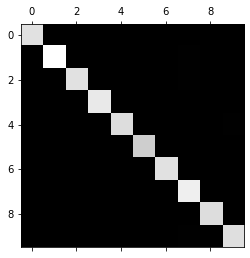

In [ ]:
plt.matshow(c_mat,cmap='gray')


In [ ]:
lenet_5_model_V_2 = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(28,28,1), padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'),
    keras.layers.Flatten(),  
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
lenet_5_model_V_2.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
lenet_5_model_V_2.fit(X_train,y_train,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1808 - accuracy: 0.9437 - val_loss: 0.0571 - val_accuracy: 0.9846
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.0368 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0284 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0180 - val_accuracy: 0.9938


In [20]:
lenet_5_model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0497 - accuracy: 0.9842


[0.049666810780763626, 0.9842000007629395]